# A Generátor látens terében való keresés

Látens térben való keresés gradiens módszerrel

hibafüggvény: A generált kép osztályozása, majd az elvárt címkére való minimalizálás...

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt

2022-03-29 18:53:57.965215: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 18:53:57.965249: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
generator = keras.models.load_model('datas/weights/dcgan/generatorcifardc(1).h5')


# Classifier example found at: https://github.com/sheikhuzairhussain/cifar-10-keras/
classifier = keras.models.load_model('current.h5')

2022-03-29 18:54:00.352058: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-29 18:54:00.352095: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-29 18:54:00.352125: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-03-29 18:54:00.352372: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
latent_dim = 512

In [4]:
def denormalize_image(image):
    return image * 127.5 + 127.5

In [5]:
def normalize_image_for_classifier(image):
    return image / 255.0

In [6]:
cross_entropy = keras.losses.CategoricalCrossentropy()

def calc_loss(label, prediction):
    encoding = np.zeros(10)
    if label != -1:
        encoding[label] = 1
    encoding = tf.constant([encoding]) 
        
    return cross_entropy(encoding, prediction)


In [7]:
# Gradient Descent

def gradient_descent(goal_label, starting_noise, step_size, steps, verbose=False):
    noise = tf.Variable(starting_noise, name='noise')
    losses = []
    for i in range(steps):
        with tf.GradientTape() as g_tape:
            g_tape.watch(noise)

            generated_image = generator(noise, training=False)
            
            prediction = classifier(normalize_image_for_classifier(denormalize_image(generated_image)))

            loss = calc_loss(goal_label, prediction)

        gradients = g_tape.gradient(loss, noise)
        noise = noise - (step_size * gradients)

        if(verbose):
            print(f"Step: {i}, Loss: {loss}")
            plt.imshow(denormalize_image(generated_image)[0].numpy().astype("uint32"), interpolation="none")
            plt.show()

        losses.append(loss)
    return noise, losses

In [8]:
# Gradient Descent with momentum

def gradient_descent_momentum(goal_label, starting_noise, step_size, momentum, steps, verbose=False):
    noise = tf.Variable(starting_noise, name='noise')
    
    change = 0
    losses = []
    for i in range(steps):
        with tf.GradientTape() as g_tape:
            g_tape.watch(noise)

            generated_image = generator(noise, training=False)
            
            prediction = classifier(normalize_image_for_classifier(denormalize_image(generated_image)))

            loss = calc_loss(goal_label, prediction)

        gradients = g_tape.gradient(loss, noise)
        change = (step_size * gradients) + momentum * change
        noise = noise - change

        if(verbose):
            print(f"Step: {i}, Loss: {loss}")
            plt.imshow(denormalize_image(generated_image)[0].numpy().astype("uint32"), interpolation="none")
            plt.show()

        losses.append(loss)
    return noise, losses

tf.Tensor(
[[4.0215036e-15 3.1545777e-14 2.0890632e-01 3.4545803e-06 5.5316323e-03
  5.5976056e-05 7.8292406e-01 2.5785982e-03 5.6210340e-19 8.5285693e-12]], shape=(1, 10), dtype=float32)


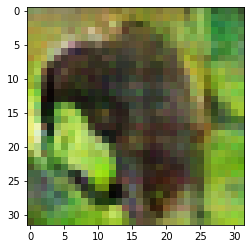

In [9]:
# Generate a random point, and an image from it

random_noise = tf.random.normal([1, latent_dim])
random_image = generator(random_noise ,training=False)
plt.imshow(denormalize_image(random_image[0]).numpy().astype("uint32"), interpolation="none")

pred = classifier(normalize_image_for_classifier(denormalize_image(random_image)), training=False)
print(pred)

Step: 0, Loss: 5.960509300231934


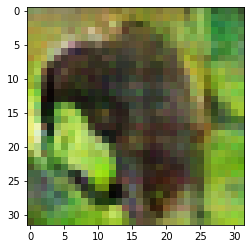

Step: 1, Loss: 93.08251190185547


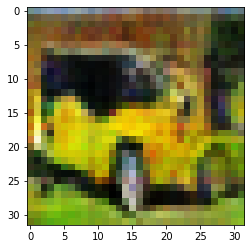

Step: 2, Loss: 6.423000335693359


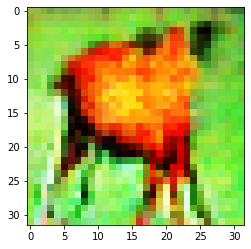

Step: 3, Loss: 0.0


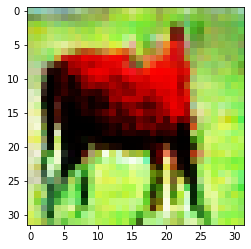

Step: 4, Loss: 0.0


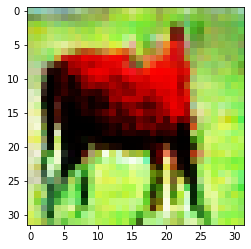

Step: 5, Loss: 0.0


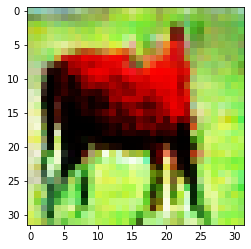

Step: 6, Loss: 0.0


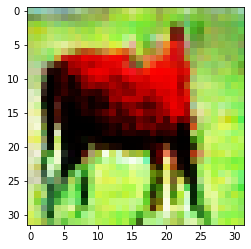

Step: 7, Loss: 0.0


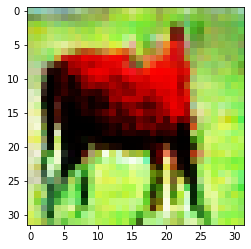

Step: 8, Loss: 0.0


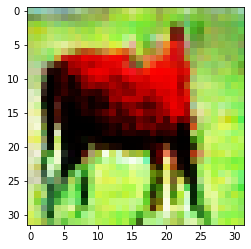

Step: 9, Loss: 0.0


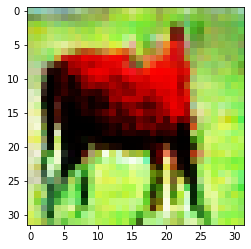

Step: 10, Loss: 0.0


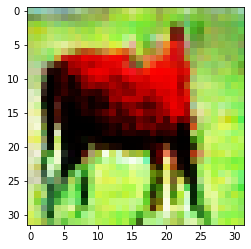

Step: 11, Loss: 0.0


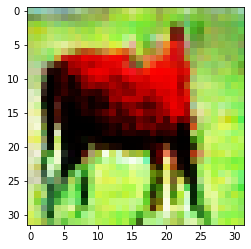

Step: 12, Loss: 0.0


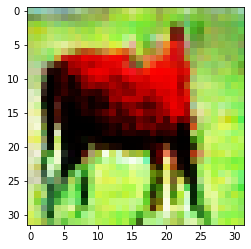

Step: 13, Loss: 0.0


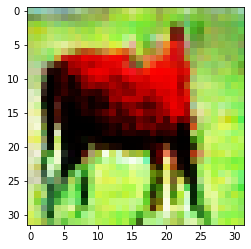

Step: 14, Loss: 0.0


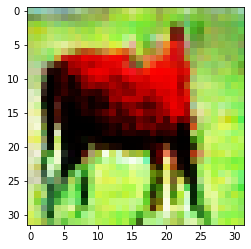

Step: 15, Loss: 0.0


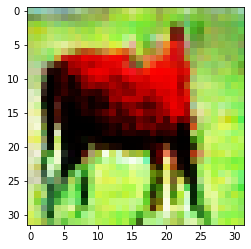

Step: 16, Loss: 0.0


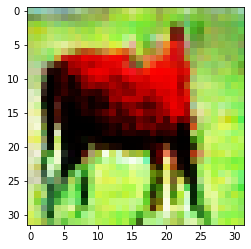

Step: 17, Loss: 0.0


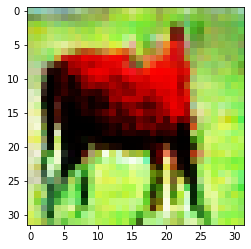

Step: 18, Loss: 0.0


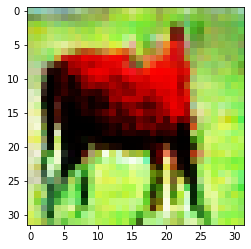

Step: 19, Loss: 0.0


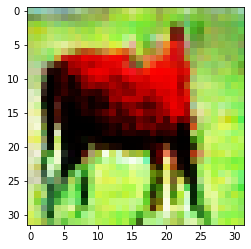

Step: 20, Loss: 0.0


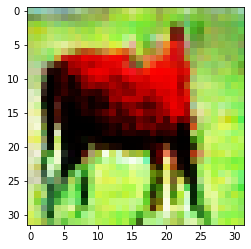

Step: 21, Loss: 0.0


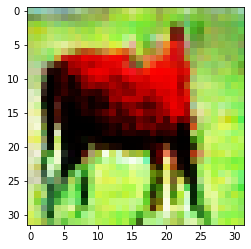

Step: 22, Loss: 0.0


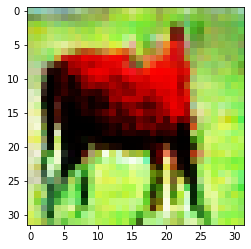

Step: 23, Loss: 0.0


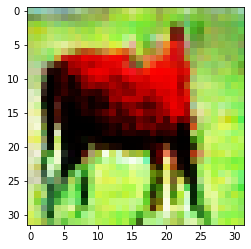

Step: 24, Loss: 0.0


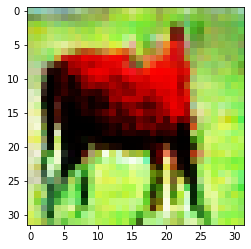

Step: 25, Loss: 0.0


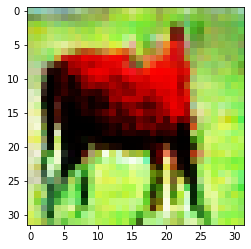

Step: 26, Loss: 0.0


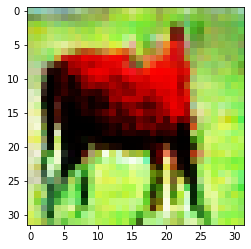

Step: 27, Loss: 0.0


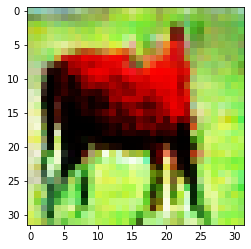

Step: 28, Loss: 0.0


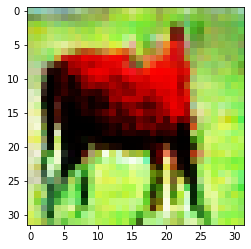

Step: 29, Loss: 0.0


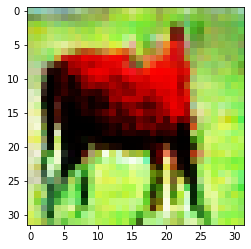

In [10]:
gradient_noise, gd_losses = gradient_descent(7, random_noise, step_size=0.1, steps=30, verbose=True)

In [11]:
generated_image = generator(gradient_noise, training=False)
            
classifier(generated_image)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        3.911987e-35, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)>

Step: 0, Loss: 5.960509300231934


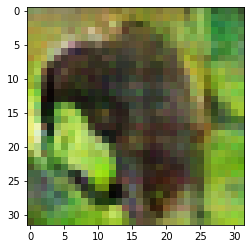

Step: 1, Loss: 0.055650584399700165


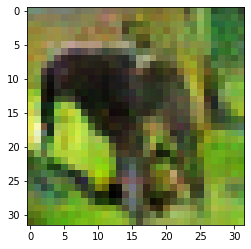

Step: 2, Loss: 12.836326599121094


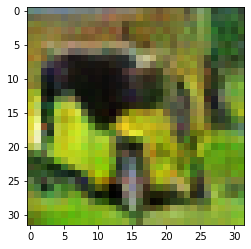

Step: 3, Loss: 0.0


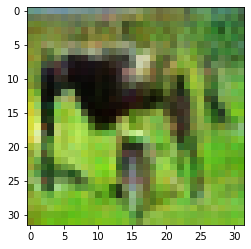

Step: 4, Loss: 1.1920928244535389e-07


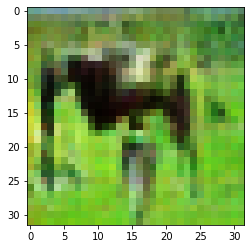

Step: 5, Loss: 0.04759470000863075


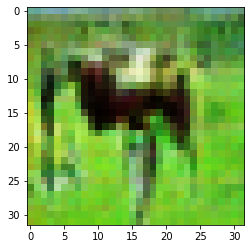

Step: 6, Loss: 1.4305104514278355e-06


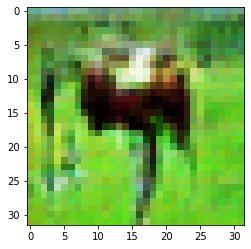

Step: 7, Loss: 0.0


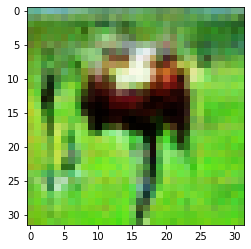

Step: 8, Loss: 0.0


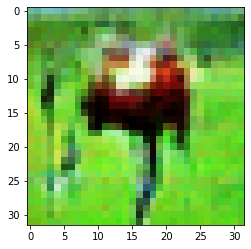

Step: 9, Loss: 0.0


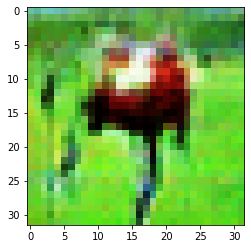

Step: 10, Loss: 0.0


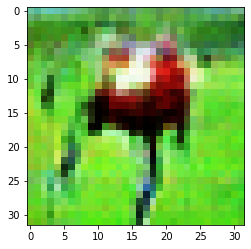

Step: 11, Loss: 0.0


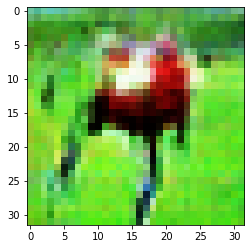

Step: 12, Loss: 0.0


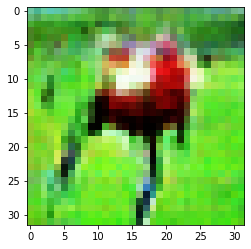

Step: 13, Loss: 3.576278118089249e-07


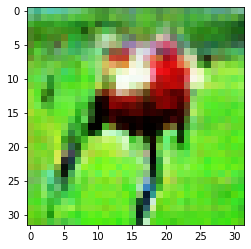

Step: 14, Loss: 1.0728830375228426e-06


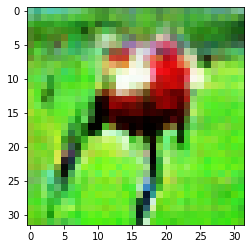

Step: 15, Loss: 2.861018856492592e-06


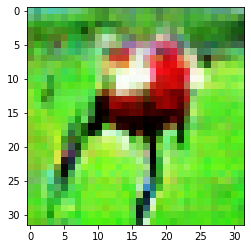

Step: 16, Loss: 2.7418097943154862e-06


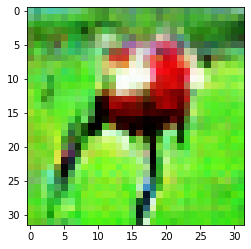

Step: 17, Loss: 2.145764938177308e-06


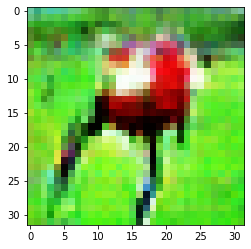

Step: 18, Loss: 1.1920922133867862e-06


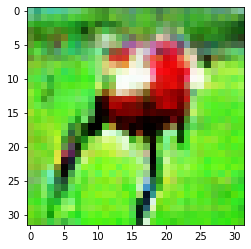

Step: 19, Loss: 8.344646857949556e-07


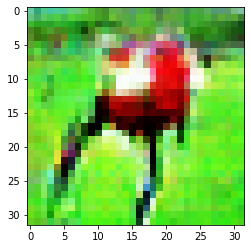

Step: 20, Loss: 7.152555099310121e-07


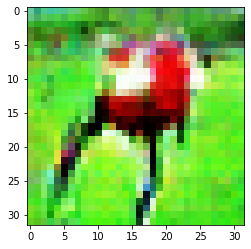

Step: 21, Loss: 5.960462772236497e-07


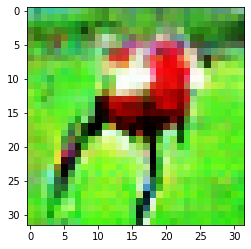

Step: 22, Loss: 4.768370445162873e-07


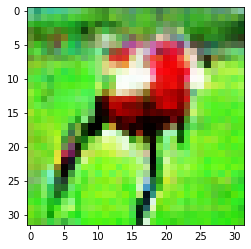

Step: 23, Loss: 3.576278118089249e-07


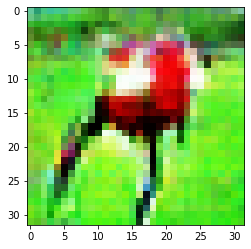

Step: 24, Loss: 3.576278118089249e-07


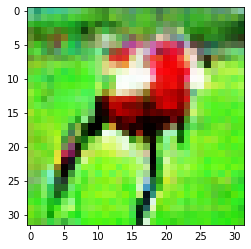

Step: 25, Loss: 3.576278118089249e-07


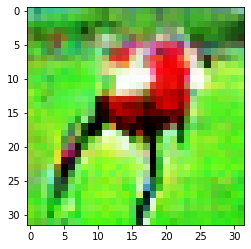

Step: 26, Loss: 3.576278118089249e-07


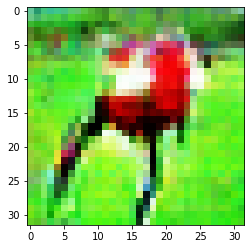

Step: 27, Loss: 2.3841855067985307e-07


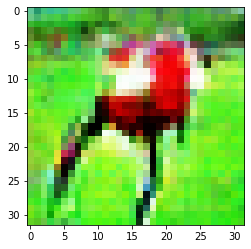

Step: 28, Loss: 2.3841855067985307e-07


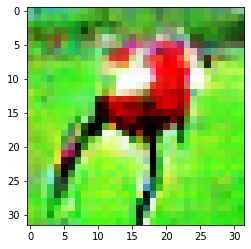

Step: 29, Loss: 2.3841855067985307e-07


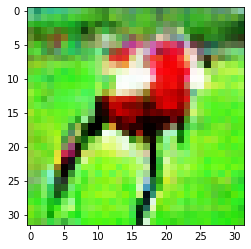

In [12]:

gradient_momentum_noise, gdm_losses =\
    gradient_descent_momentum(7, random_noise, step_size=0.03, momentum=0.9, steps=30, verbose=True)

In [13]:
generated_image = generator(gradient_momentum_noise, training=False)
            
classifier(generated_image)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[8.1499435e-15, 6.1196311e-35, 3.0103640e-25, 9.7149221e-29,
        1.2765413e-18, 7.1970870e-27, 4.9513474e-36, 1.0000000e+00,
        0.0000000e+00, 5.4404795e-29]], dtype=float32)>

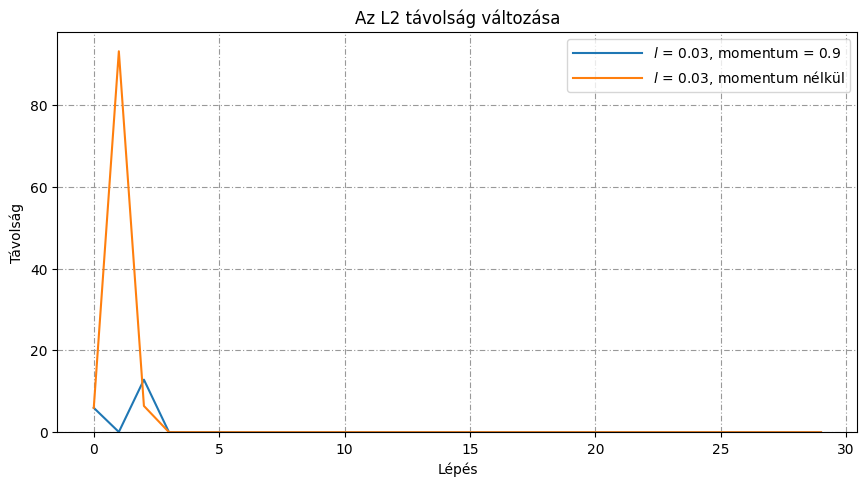

In [14]:
fig_1 = plt.figure(figsize=(8, 4), dpi=100)
ax = fig_1.add_axes([0, 0, 1, 1])
ax.set_xlabel('Lépés')
ax.set_ylabel('Távolság')
ax.set_title('Az L2 távolság változása')

ax.grid(True, color='0.6', dashes=(5, 2, 1, 2))

ax.plot(gdm_losses, label="$l$ = 0.03, momentum = 0.9")
ax.plot(gd_losses, label="$l$ = 0.03, momentum nélkül")
ax.set_ylim(bottom=0)
ax.legend(loc=0, handlelength=5)

plt.show()